In [1]:
import os, collections, itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 300

In [2]:
dfs = []
for region in ("IGK", "TRA", 'HLA', "IGH"):
    tsv = f"../../data/evaluation/CHM13/{region}/pbsim_ONT_93_30k/kmer_k16/overlap_statistics.tsv"
    df = pd.read_table(tsv)
    df.insert(0, "region", region)
    dfs.append(df)
stat_df = pd.concat(dfs)
df = stat_df
df['label'] = df['config_id'].map(str) + " " + df['description']
df['connected_fraction'] = 1 - df['singleton_fraction']

In [3]:
stat_df['label'].unique()

array(['0 Minimap2 all-vs-all', '1 HNSW (IDF, Spectral 100 dim.)',
       '2 HNSW (IDF, scBiMap 100 dim.)',
       '3 HNSW (TF-IDF, Spectral 100 dim.)',
       '4 HNSW (TF-IDF, scBiMap 100 dim.)', '5 LowHash (binary)',
       '6 MinHash (binary)', '7 Weighted LowHash (TF)',
       '8 Weighted LowHash (IDF)', '9 Weighted LowHash (TF-IDF)',
       '10 Weighted MinHash (TF)', '11 Weighted MinHash (IDF)',
       '12 Weighted MinHash (TF-IDF)', '13 PQ (IDF, 100 dim.)',
       '14 PQ (TF-IDF, 100 dim.)', '15 NNdescent (IDF)',
       '16 NNdescent (TF-IDF)', '17 Exact Euclidean (binary)',
       '18 Exact Euclidean (TF)', '19 Exact Euclidean (IDF)',
       '20 Exact Euclidean (TF-IDF)',
       '21 Exact Euclidean (IDF, Spectral 100 dim.)',
       '22 Exact Euclidean (IDF, Spectral 500 dim.)',
       '23 Exact Euclidean (TF-IDF, Spectral 100 dim.)',
       '24 Exact Euclidean (IDF, scBiMap 100 dim.)',
       '25 Exact Euclidean (IDF, scBiMap 500 dim.)',
       '26 Exact Euclidean (TF-IDF, scBi

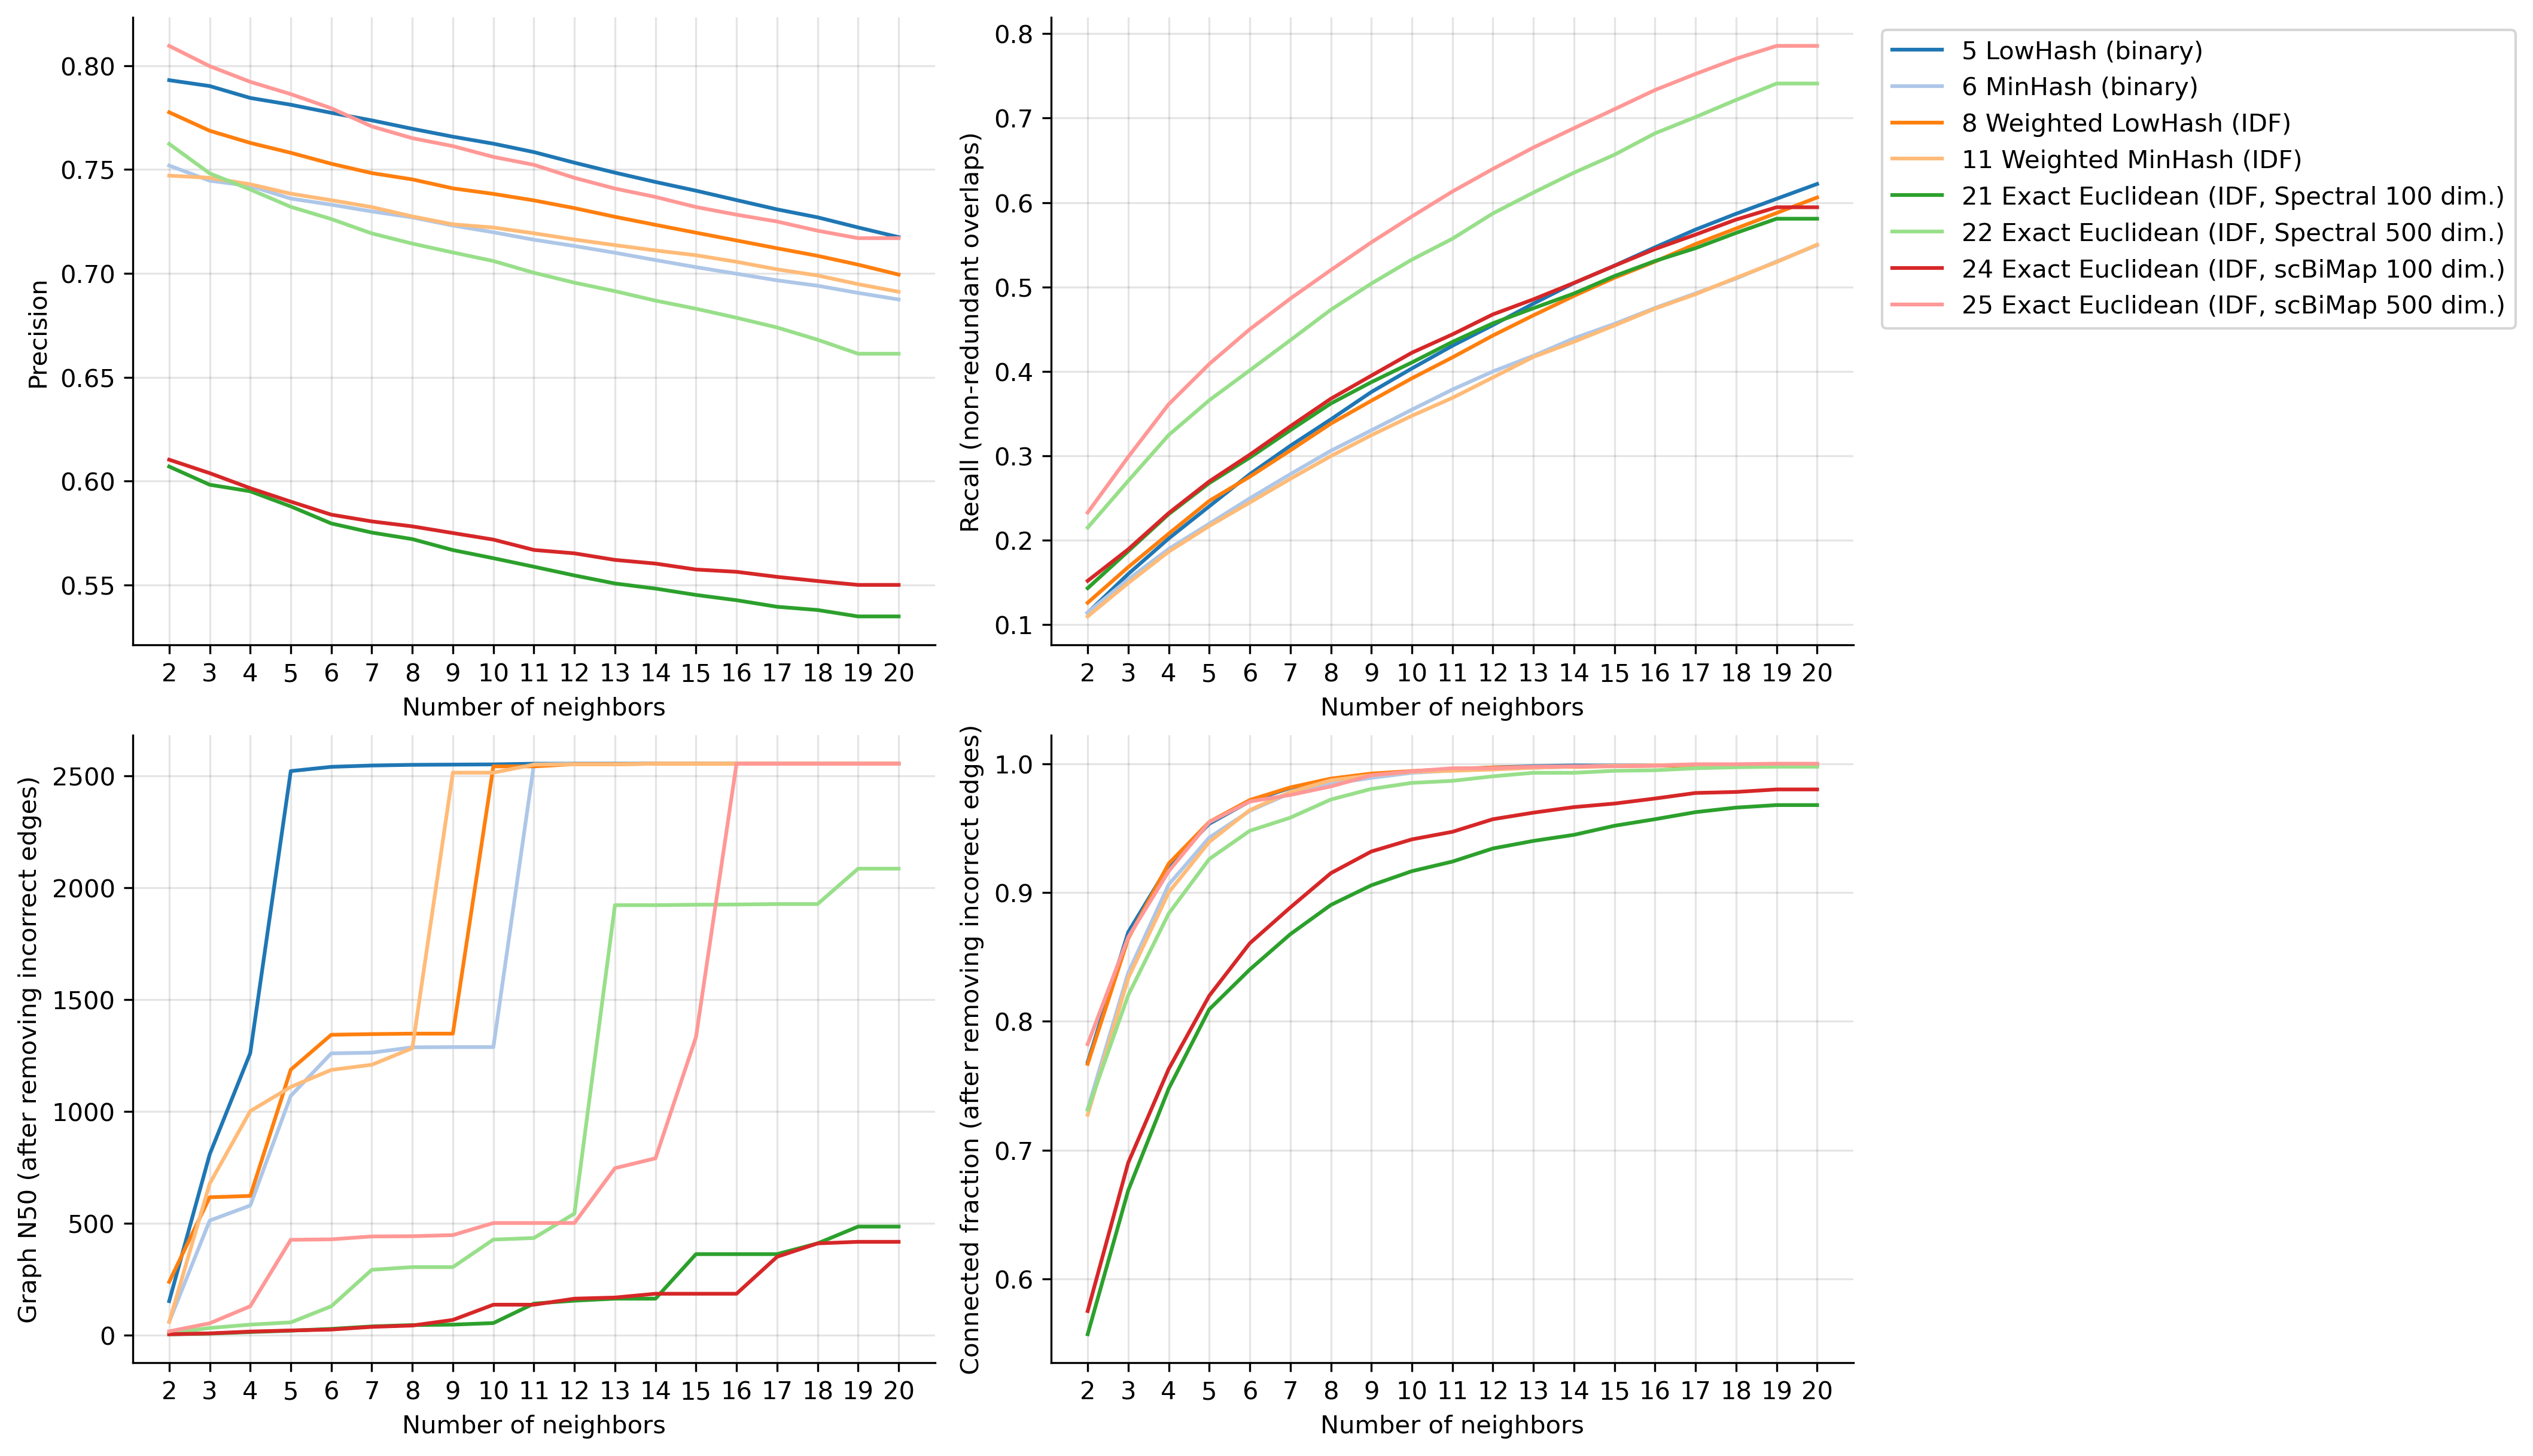

In [14]:
selected_configs = [0,  5, 6, 21, 22, 23, 24, 25, 26]
selected_configs = [5, 6, 8, 11, 21, 22, 24, 25]

df = stat_df.query("region == 'IGK' & config_id in @selected_configs")

y_labels = dict(
    precision="Precision",
    nr_recall="Recall (non-redundant overlaps)",
    N50="Graph N50 (after removing incorrect edges)",
    connected_fraction="Connected fraction (after removing incorrect edges)"
)

palette = 'tab20'
k_values = np.arange(2, df['n_neighbors'].max() + 1)

fig, axes = plt.subplots(2, 2, figsize=(14, 8), constrained_layout=True)
for i, ax in enumerate( itertools.chain(*axes) ):
    y = list(y_labels)[i]
    x = 'n_neighbors'
    hue = 'label'
    g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue=hue, palette=palette)
    ax.set_xticks(k_values)
    ax.set_xlabel("Number of neighbors")
    ax.set_ylabel(y_labels[y])
    ax.grid(axis='both', color='k', alpha=0.1)

    if i == 1:
        ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
    else:
        ax.get_legend().remove()

    ax.spines[['top', 'right']].set_visible(False)

(0.5, 0.85)

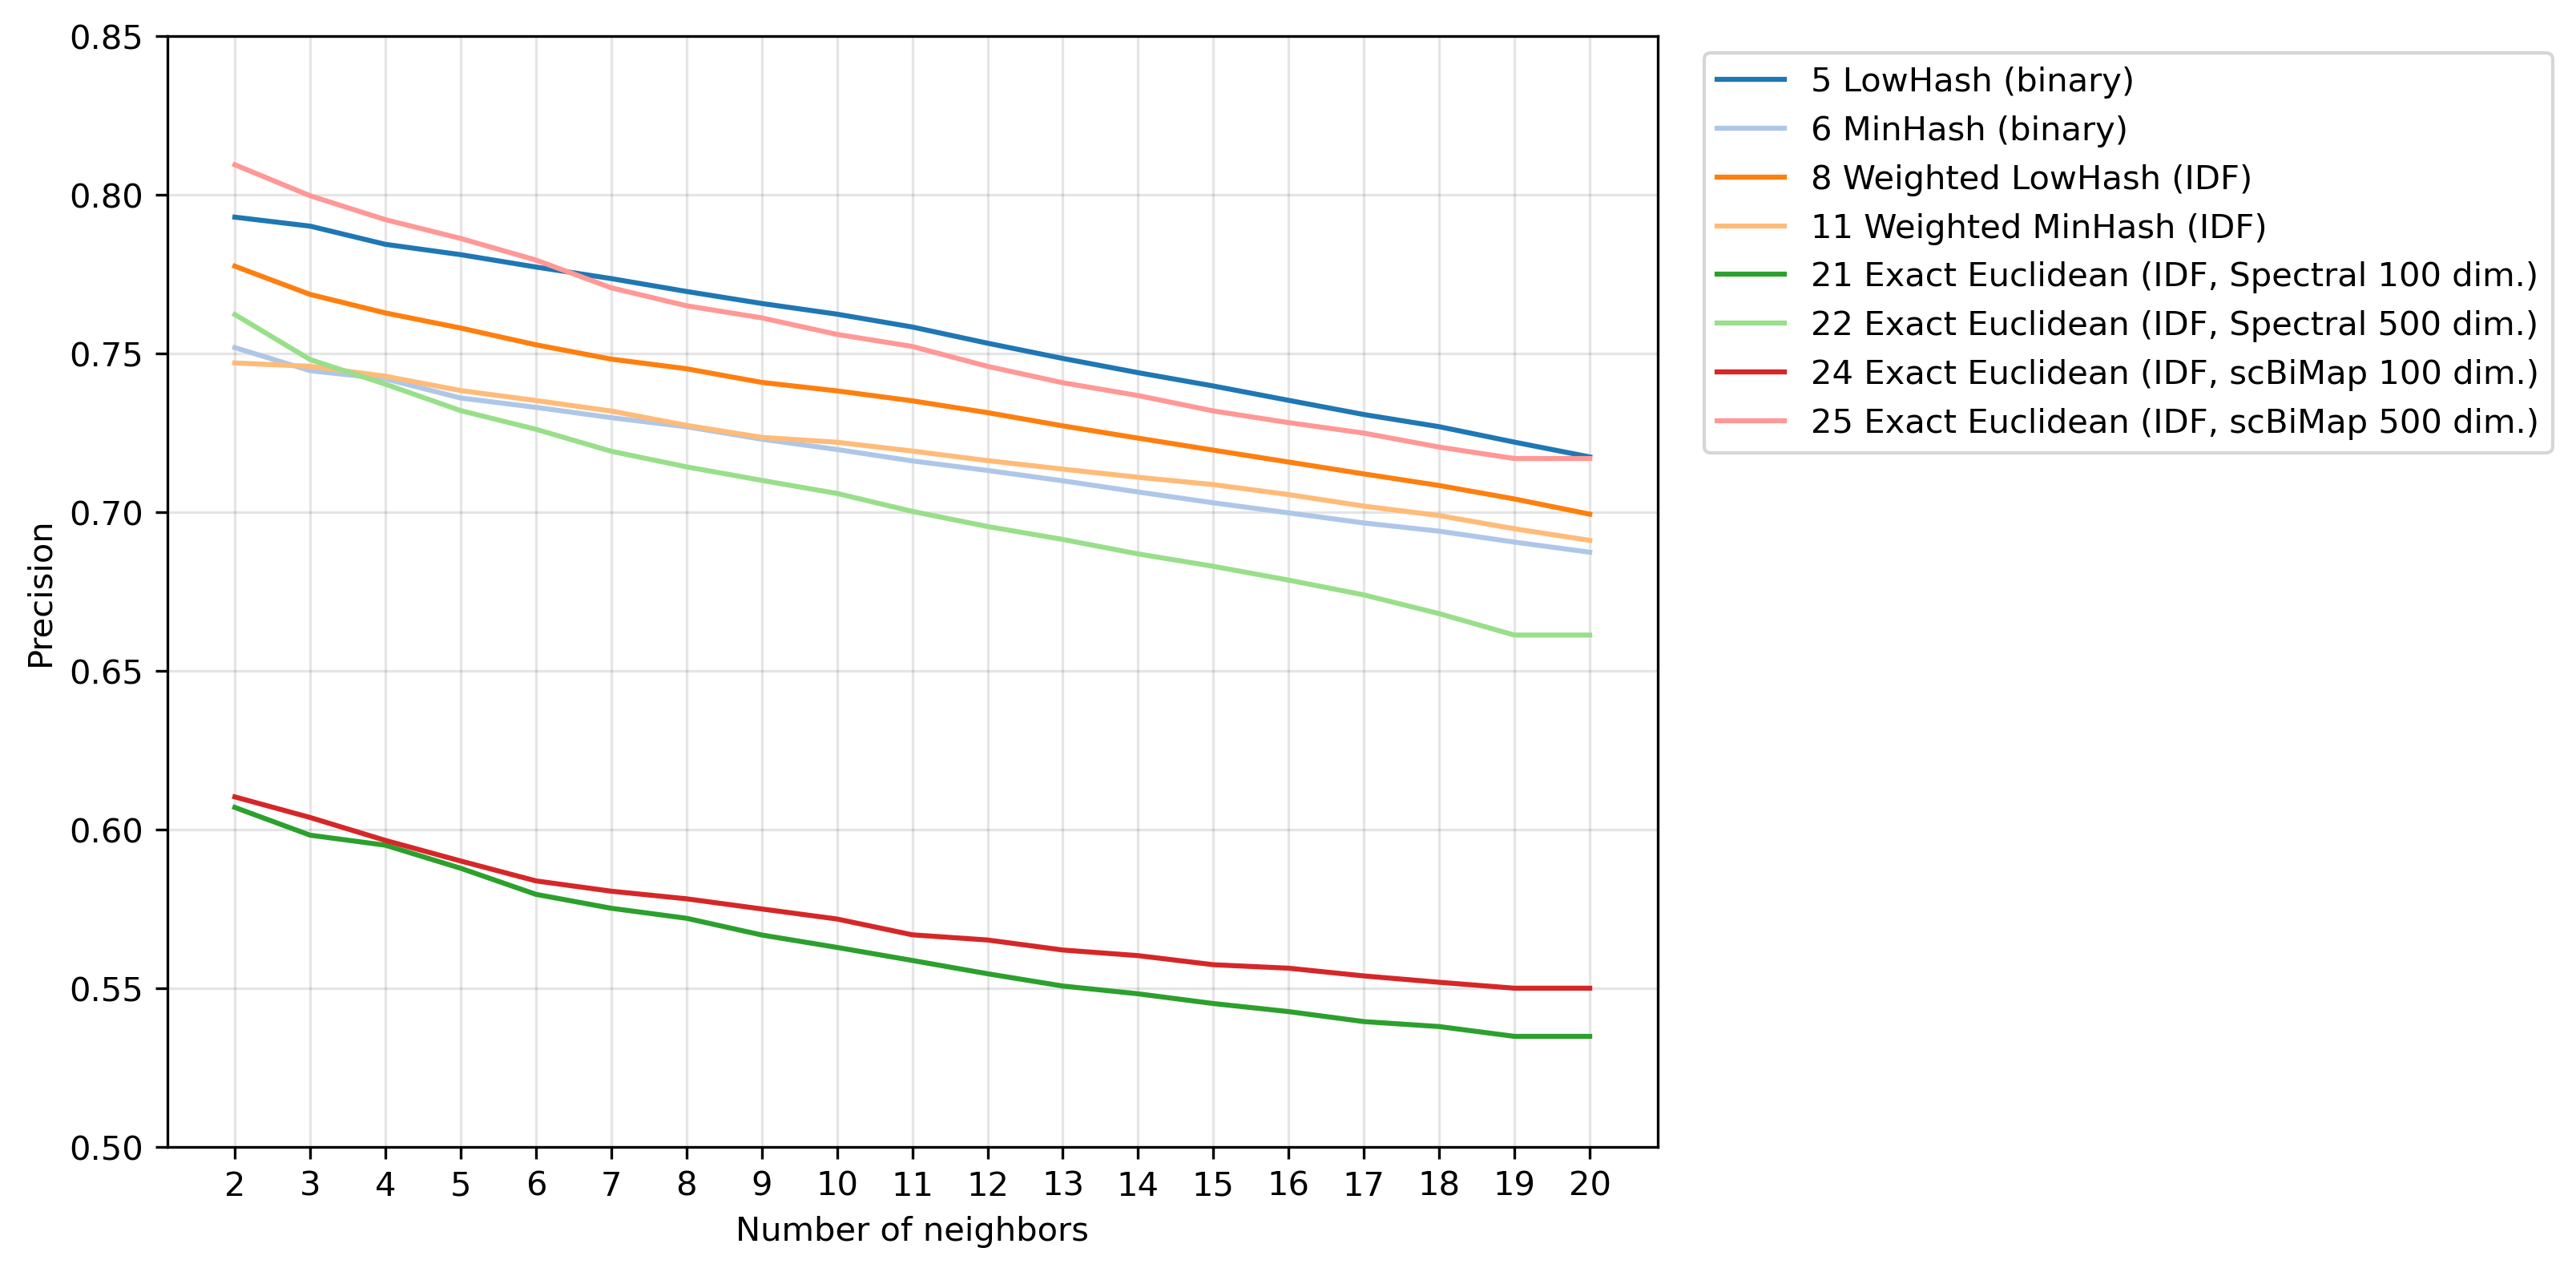

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
y = 'precision'
g = seaborn.lineplot(ax=ax, data=df, x=x, y=y, hue='label', palette=palette)
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_xticks(k_values)
ax.set_xlabel("Number of neighbors")
ax.set_ylabel(y_labels[y])
ax.grid(axis='both', color='k', alpha=0.1)
ax.set_ylim(0.5, 0.85)

In [20]:
stat_df

,region,Unnamed: 0,config_id,description,n_neighbors,precision,nr_precision,recall,nr_recall,singleton_count,singleton_fraction,N50,label,connected_fraction
0,IGK,0,0,Minimap2 all-vs-all,2,0.516464,0.090937,0.049058,0.090412,2634,0.515864,28,0 Minimap2 all-vs-all,0.484136
1,IGK,1,0,Minimap2 all-vs-all,3,0.513960,0.095905,0.072551,0.141699,2204,0.431649,78,0 Minimap2 all-vs-all,0.568351
2,IGK,2,0,Minimap2 all-vs-all,4,0.511360,0.096075,0.095249,0.187310,1836,0.359577,105,0 Minimap2 all-vs-all,0.640423
3,IGK,3,0,Minimap2 all-vs-all,5,0.508627,0.095531,0.117038,0.230083,1534,0.300431,125,0 Minimap2 all-vs-all,0.699569
4,IGK,4,0,Minimap2 all-vs-all,6,0.503938,0.094373,0.137548,0.269613,1338,0.262045,209,0 Minimap2 all-vs-all,0.737955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,IGH,508,26,"Exact Euclidean (TF-IDF, scBiMap 100 dim.)",16,0.942082,0.165631,0.430744,0.802258,0,0.000000,1517,"26 Exact Euclidean (TF-IDF, scBiMap 100 dim.)",1.000000
509,IGH,509,26,"Exact Euclidean (TF-IDF, scBiMap 100 dim.)",17,0.939522,0.160519,0.454029,0.821758,0,0.000000,1517,"26 Exact Euclidean (TF-IDF, scBiMap 100 dim.)",1.000000
510,IGH,510,26,"Exact Euclidean (TF-IDF, scBiMap 100 dim.)",18,0.936576,0.155388,0.476893,0.838180,0,0.000000,1517,"26 Exact Euclidean (TF-IDF, scBiMap 100 dim.)",1.000000
511,IGH,511,26,"Exact Euclidean (TF-IDF, scBiMap 100 dim.)",19,0.932689,0.149955,0.498950,0.849812,0,0.000000,1517,"26 Exact Euclidean (TF-IDF, scBiMap 100 dim.)",1.000000
